In [6]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
%matplotlib inline
import numpy as np

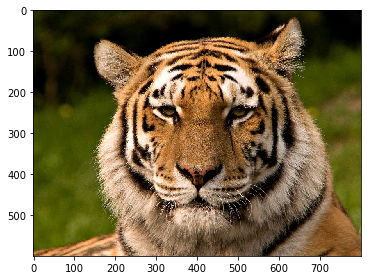

In [27]:
IMG = imread('tiger-color.png')
imshow(IMG)

In [28]:
# Перевод из RGB в YUV и наоборот
def RGBtoYUV(IMG):
    img_f = img_as_float(IMG.copy())
    YUV = img_f.copy()
    YUV[:,:,0] = img_f[:,:,0]*0.2126 + img_f[:,:,1]*0.7152 + img_f[:,:,2]*0.0722 #Y
    YUV[:,:,1] = -img_f[:,:,0]*0.0999 - img_f[:,:,1]*0.3360 + img_f[:,:,2]*0.4360 #U
    YUV[:,:,2] = img_f[:,:,0]*0.6150 - img_f[:,:,1]*0.5586 - img_f[:,:,2]*0.0563 #V
    return YUV
def YUVtoRGB(YUV):
    img_f = YUV.copy()
    img_f[:,:,0] = YUV[:,:,0] + 1.2803 * YUV[:,:,2]
    img_f[:,:,1] = YUV[:,:,0] - 0.2148 * YUV[:,:,1]  - 0.3805 * YUV[:,:,2]
    img_f[:,:,2] = YUV[:,:,0] + 2.1279 * YUV[:,:,1]
    img_f = np.clip(img_f, 0, 1)
    return img_f
YUV = RGBtoYUV(IMG)

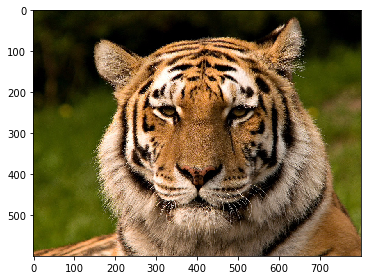

In [29]:
# Прореживание
def toDEC(YUV, n):
    YUV = RGBtoYUV(IMG)
    # Номера элементов, который будут использованы для децимации
    height = [i for i in range(YUV.shape[0]) if i%n==0]
    width = [i for i in range(YUV.shape[1]) if i%n==0]
    DEC = YUV.copy()
    DEC_Y = DEC[:, :, 0]
    for i in range(len(height)):
        for j in range(len(width)):
            for k in range(n):
                for k2 in range(n):
                    try:
                        DEC[height[i] + k, width[j] + k2, 1] = YUV[height[i], width[j], 1] # В квадрат подставляется верхнее левое значение
                        DEC[height[i] + k, width[j] + k2, 2] = YUV[height[i], width[j], 2]
                    except:
                        pass
    DEC_U = DEC[:, :, 1]
    DEC_V = DEC[:, :, 2]
    return YUVtoRGB(np.dstack([DEC_Y, DEC_U, DEC_V]))
DEC = toDEC(IMG, 2)
imshow(DEC)

In [30]:
imsave('decimial.png', img_as_ubyte(DEC))

In [23]:
DEC.shape

(600, 800, 3)